# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Abrir el archivo CSV
df = pd.read_csv('C:/Users/Usuario/Documents/Ciencia de datos/TP2/Base Airbnb NY.csv')

# Mostrar las primeras filas del dataframe
df.head()

# Verificar si hay IDs duplicados
id_duplicados = df[df.duplicated('id')]
id_duplicados.head()

# Remover IDs duplicados
df = df.drop_duplicates(subset='id')

# Eliminar columnas que no tienen información de interés
columnas_a_eliminar = ['name', 'host_id', 'host_name','neighbourhood', 'last_review']
df = df.drop(columns=columnas_a_eliminar)
df.head()





,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3647,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,5022,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


In [3]:
# Verificar si hay valores faltantes en 'reviews_per_month' que tengan un valor distinto de 0 en 'number_of_reviews'
faltantes_reviews_per_month = df[(df['reviews_per_month'].isna()) & (df['number_of_reviews'] != 0)]
faltantes_reviews_per_month.head()


,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [4]:
# Mostrar las observaciones de la variable 'reviews_per_month' mayores a 30
observaciones_reviews_per_month_mayores_30 = df[df['reviews_per_month'] > 30]
observaciones_reviews_per_month_mayores_30.head()

# Eliminar las observaciones que tienen un valor de 'reviews_per_month' mayor a 30, pero conservar los NaN
df = df[(df['reviews_per_month'] <= 30) | (df['reviews_per_month'].isna())]


# Se decide hacer esto porque un airbnb con más de 30 reviews por mes es muy raro.

In [5]:
# Verificar si hay valores de 'calculated_host_listings_count' menores o iguales a 0
valores_calculated_host_listings_count_menores_igual_0 = df[df['calculated_host_listings_count'] <= 0]
valores_calculated_host_listings_count_menores_igual_0.head()

,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [6]:
# Mostrar las observaciones que tienen un valor de minimum_nights mayor a 365
observaciones_minimum_nights_mayor_365 = df[df['minimum_nights'] > 365]
observaciones_minimum_nights_mayor_365.head()

# Eliminar las observaciones que tienen un valor de minimum_nights mayor a 365
df = df[df['minimum_nights'] <= 365]

# Al ver que las obervaciones que tienen un valor mayor a 365 son muy pocas, 
# no tienen reviews en su mayoria y la disponibilidad de dias al año es mucho menor, se considera eliminarlas.
# Se decide dejar las que son de 365 dias porque el alquiler de larga duracion existe en airbnb y presentan reseñas
# y la disponibilidad de dias al año es mayor.

In [7]:
# Mostrar las observaciones de 'availability_365' mayores a 365 y menores o iguales a 0
observaciones_availability_365_invalidas = df[(df['availability_365'] > 365) | (df['availability_365'] <= 0)]
observaciones_availability_365_invalidas.head()

# Agrupar por 'neighbourhood_group' y contar la cantidad de observaciones inválidas
conteo_availability_365_invalidas = observaciones_availability_365_invalidas.groupby('availability_365').size()
conteo_availability_365_invalidas.head()

# Se eliminan las observaciones con valor -999 en 'availability_365'. No se eliminan los 0, 
# aunque no tengan sentido, represetan casi 1/3 del dataset.

df = df[df['availability_365'] != -999]

In [8]:
# Verificar si hay valores de 'price' menores o iguales a 0
valores_price_menores_igual_0 = df[df['price'] <= 0]
valores_price_menores_igual_0.head()

# Eliminar la observación que tenga price = 0
df = df[df['price'] != 0]

# Mostrar las filas con valores faltantes en 'price'
faltantes_price = df[df['price'].isna()]
faltantes_price.head()


,id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4506,3111416,Manhattan,40.71848,-73.98159,Entire home/apt,NaN,28,13,0.21,1,38
12555,9652365,Brooklyn,40.73419,-73.95905,Private room,NaN,5,24,0.56,2,179
12913,9825420,Brooklyn,40.66817,-73.98774,Private room,NaN,2,0,NaN,1,0
25382,20304193,Brooklyn,40.64007,-73.98011,Private room,NaN,2,29,1.25,4,170
26765,21250819,Bronx,40.85632,-73.88631,Private room,NaN,3,7,0.38,2,357


In [9]:
# Instalar la librería missingno para visualizar los valores faltantes

%pip install missingno

Note: you may need to restart the kernel to use updated packages.


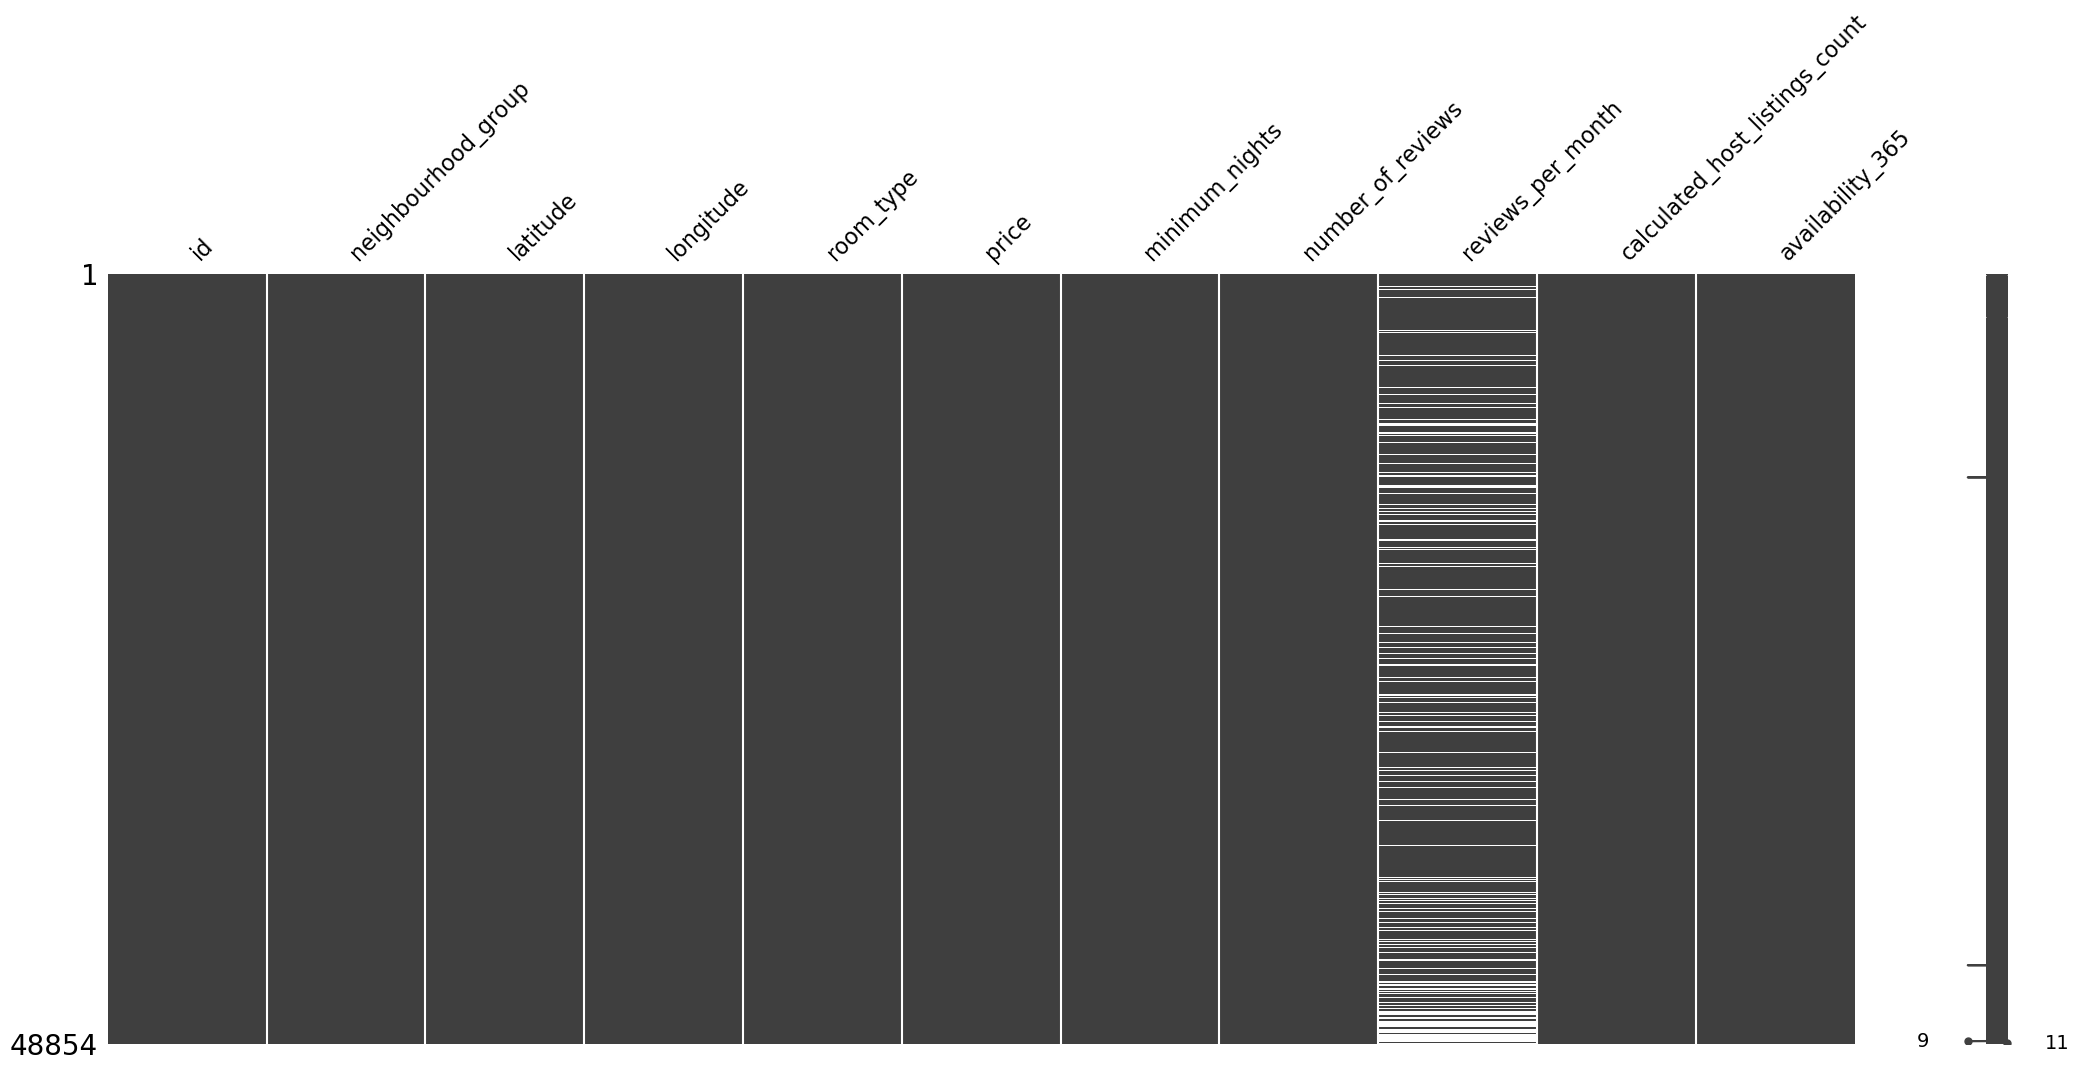

In [10]:
# Importar la librería missingno

import missingno as msno

# Visualizar el patrón de datos faltantes
msno.matrix(df)
plt.show()

In [12]:
# Verificar y mostrar los valores faltantes en el dataframe
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
id                                    0
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10039
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [13]:
# Reemplazar los valores faltantes por la mediana de la variable para las variables numéricas (solo se modificaria price)
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    mediana = df[columna].median()
    if columna == 'reviews_per_month':
        df.loc[df['number_of_reviews'] == 0, columna] = df.loc[df['number_of_reviews'] == 0, columna].fillna(0)
        df.loc[df['number_of_reviews'] != 0, columna] = df.loc[df['number_of_reviews'] != 0, columna].fillna(mediana)
    else:
        df[columna].fillna(mediana, inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_84432\2439008627.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(mediana, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_84432\2439008627.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [14]:
# Identificar las columnas numéricas relevantes para graficar la distribucion
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
columnas_numericas = columnas_numericas.drop('id')


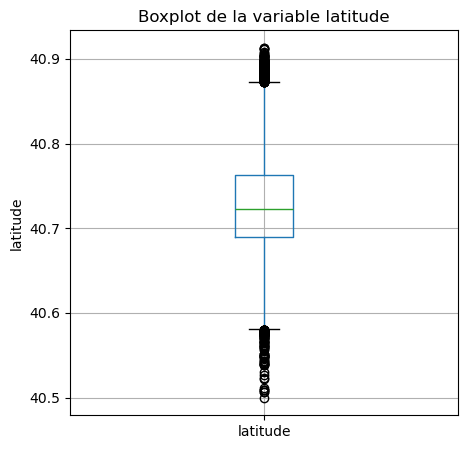

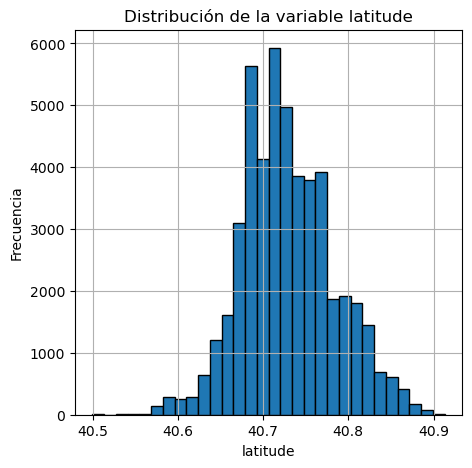

Outliers en la variable latitude (de mayor a menor):
       latitude
48029  40.91306
47790  40.91234
23011  40.91169
48033  40.91167
3349   40.90804
...         ...
23460  40.50873
1424   40.50868
15278  40.50708
46919  40.50641
14119  40.49979

[422 rows x 1 columns]
Cantidad de outliers en la variable latitude: 422


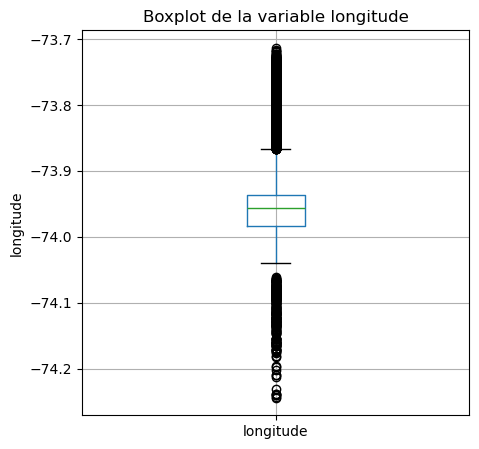

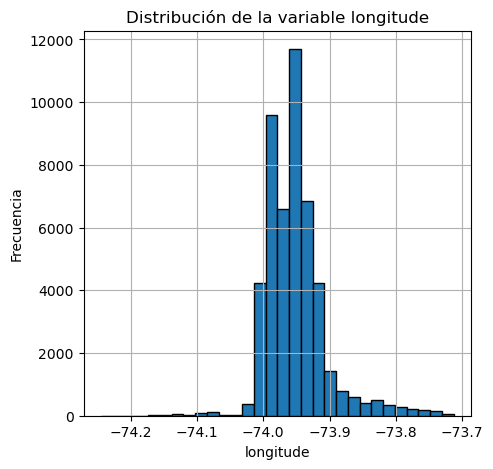

Outliers en la variable longitude (de mayor a menor):
       longitude
10920  -73.71299
47208  -73.71690
11610  -73.71795
45592  -73.71829
38562  -73.71928
...          ...
23460  -74.23914
1424   -74.23986
14119  -74.24084
15278  -74.24285
45652  -74.24442

[2831 rows x 1 columns]
Cantidad de outliers en la variable longitude: 2831


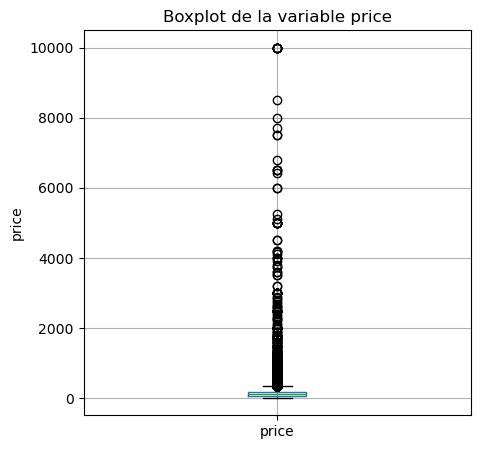

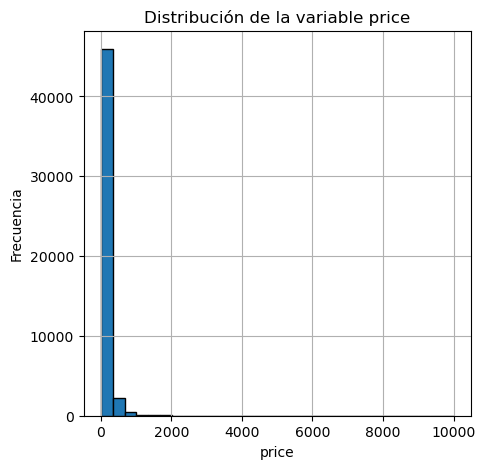

Outliers en la variable price (de mayor a menor):
         price
29238  10000.0
17692  10000.0
9151   10000.0
6530    9999.0
40433   9999.0
...        ...
44761    335.0
10398    335.0
30330    335.0
19462    335.0
35414    335.0

[2971 rows x 1 columns]
Cantidad de outliers en la variable price: 2971


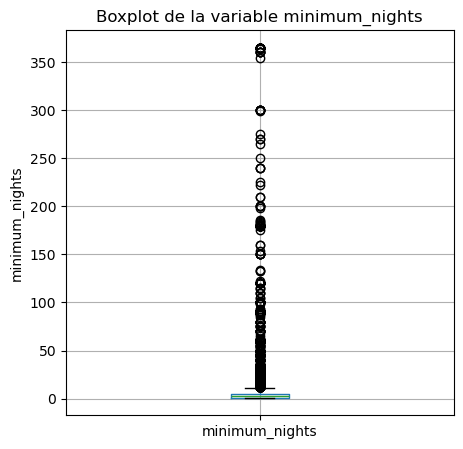

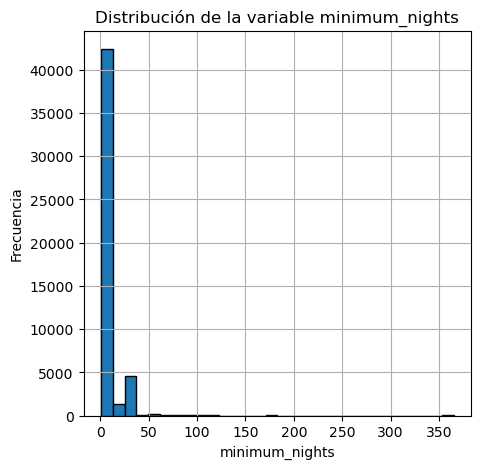

Outliers en la variable minimum_nights (de mayor a menor):
       minimum_nights
17338             365
4372              365
19794             365
15899             365
39875             365
...               ...
12848              12
36101              12
34156              12
27893              12
21198              12

[6590 rows x 1 columns]
Cantidad de outliers en la variable minimum_nights: 6590


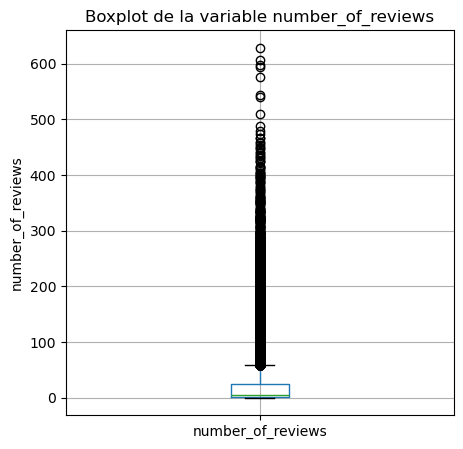

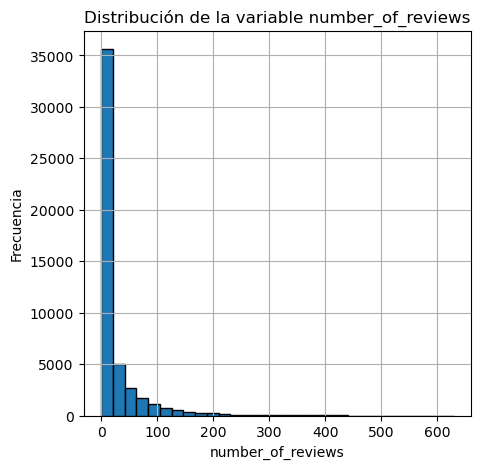

Outliers en la variable number_of_reviews (de mayor a menor):
       number_of_reviews
11759                629
2031                 607
2030                 597
2015                 594
13495                576
...                  ...
22050                 59
19600                 59
11087                 59
33002                 59
28138                 59

[6014 rows x 1 columns]
Cantidad de outliers en la variable number_of_reviews: 6014


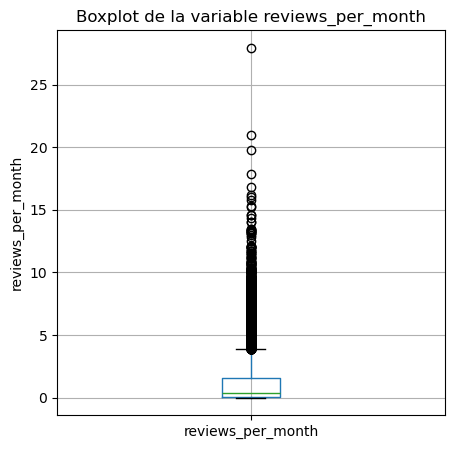

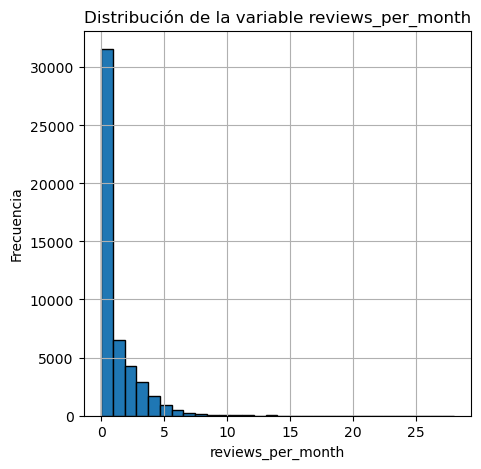

Outliers en la variable reviews_per_month (de mayor a menor):
       reviews_per_month
42076              27.95
38870              20.94
27287              19.75
28651              17.82
29628              16.81
...                  ...
14372               3.90
7332                3.90
8995                3.90
9786                3.90
30832               3.90

[3307 rows x 1 columns]
Cantidad de outliers en la variable reviews_per_month: 3307


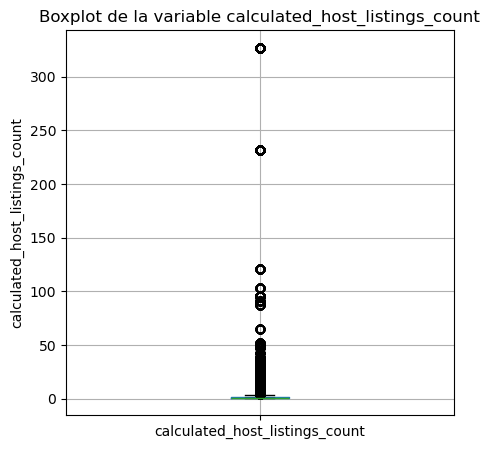

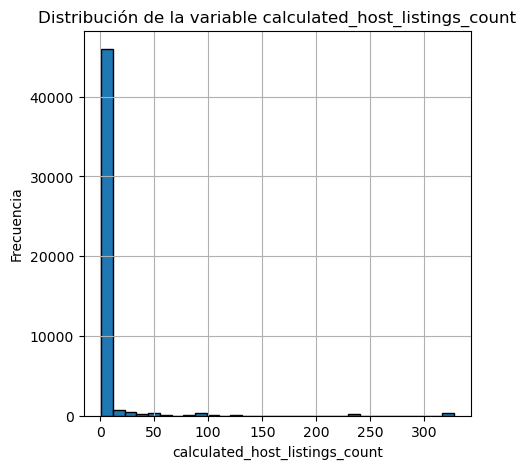

Outliers en la variable calculated_host_listings_count (de mayor a menor):
       calculated_host_listings_count
44582                             327
45948                             327
44619                             327
44618                             327
41421                             327
...                               ...
19894                               4
19896                               4
30985                               4
30953                               4
42554                               4

[7071 rows x 1 columns]
Cantidad de outliers en la variable calculated_host_listings_count: 7071


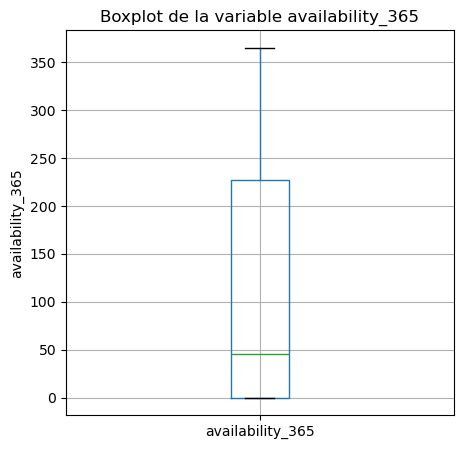

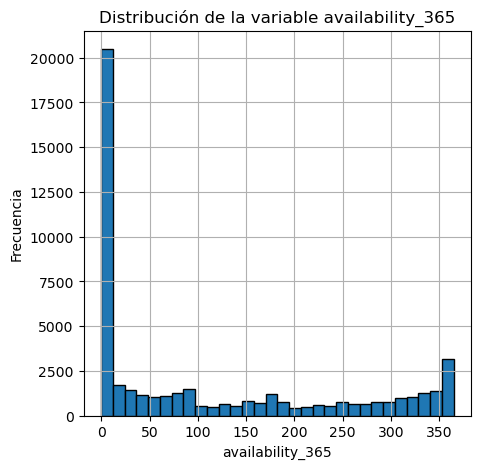

Outliers en la variable availability_365 (de mayor a menor):
Empty DataFrame
Columns: [availability_365]
Index: []
Cantidad de outliers en la variable availability_365: 0


In [15]:
# Importar la librería numpy para realizar cálculos numéricos

import numpy as np

# Generar un gráficos (histogramas y boxplot) a partir de un for. E identificar los outliers.

for columna in columnas_numericas:
    # Generar un boxplot para cada columna numérica
    plt.figure(figsize=(5, 5))
    df.boxplot(column=columna)
    plt.title(f'Boxplot de la variable {columna}')
    plt.ylabel(columna)
    plt.show()
    
    # Mostrar la distribución de cada columna numérica con histograma
    plt.figure(figsize=(5, 5))
    df[columna].hist(bins=30, edgecolor='black')
    plt.title(f'Distribución de la variable {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

    # Identificar los outliers en cada columna numérica
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]

    # Mostrar la lista de outliers de mayor a menor
    outliers_sorted = outliers[[columna]].sort_values(by=columna, ascending=False)
    print(f'Outliers en la variable {columna} (de mayor a menor):')
    print(outliers_sorted)

    # Contar la cantidad de outliers
    cantidad_outliers = outliers.shape[0]
    print(f'Cantidad de outliers en la variable {columna}: {cantidad_outliers}')
    
    # Eliminar los outliers del dataframe (no se realiza en este caso)
    #df = df[~df.index.isin(outliers.index)]
   






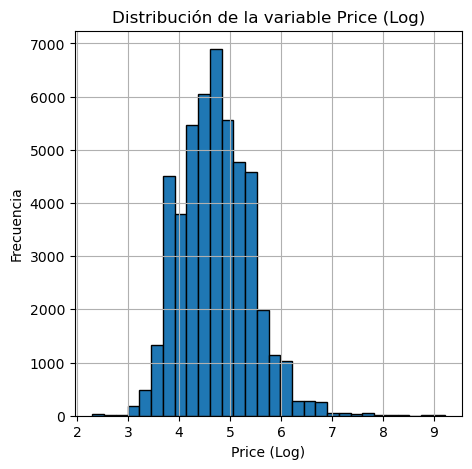

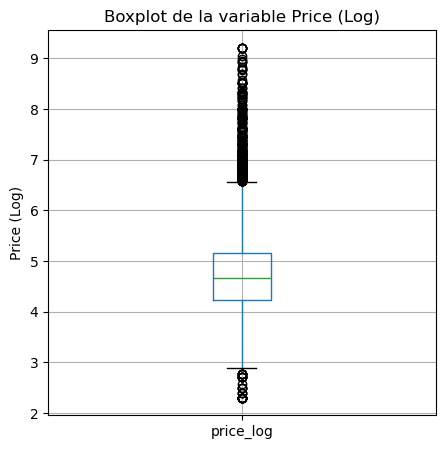

Cantidad de outliers en la variable price_log: 626


In [16]:


# Convertir la columna 'price' a logaritmo
df['price_log'] = df['price'].apply(lambda x: np.log(x))

# Mostrar la distribución de la variable 'price_log'
plt.figure(figsize=(5, 5))
df['price_log'].hist(bins=30, edgecolor='black')
plt.title('Distribución de la variable Price (Log)')
plt.xlabel('Price (Log)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un boxplot para la variable 'price_log'
plt.figure(figsize=(5, 5))
df.boxplot(column='price_log')
plt.title('Boxplot de la variable Price (Log)')
plt.ylabel('Price (Log)')
plt.show()

# Identificar los outliers en la variable 'price_log'
Q1_price_log = df['price_log'].quantile(0.25)
Q3_price_log = df['price_log'].quantile(0.75)
IQR_price_log = Q3_price_log - Q1_price_log
outliers_price_log = df[(df['price_log'] < (Q1_price_log - 1.5 * IQR_price_log)) | (df['price_log'] > (Q3_price_log + 1.5 * IQR_price_log))]

# Contar la cantidad de outliers
cantidad_outliers_price_log = outliers_price_log.shape[0]
print(f'Cantidad de outliers en la variable price_log: {cantidad_outliers_price_log}')






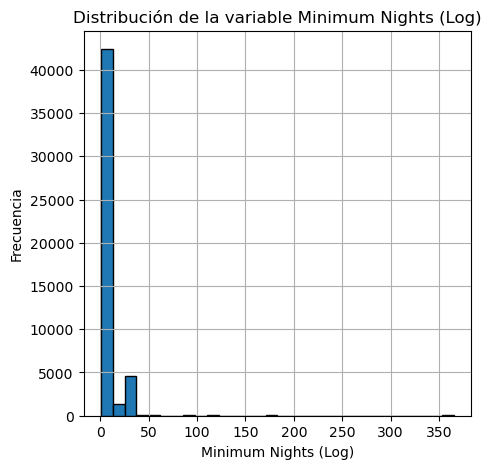

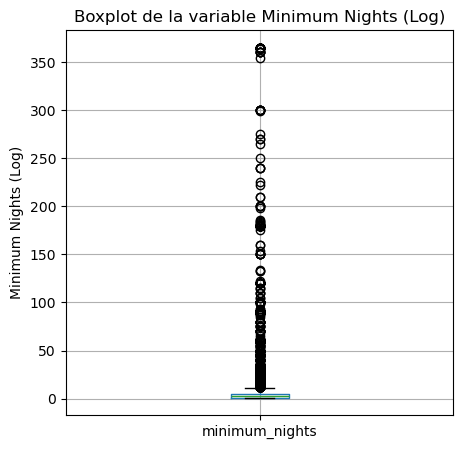

minimum_nights
1      12712
2      11691
3       7994
30      3758
4       3302
       ...  
68         1
87         1
183        1
299        1
36         1
Name: count, Length: 101, dtype: int64
Cantidad de outliers en la variable minimum_nights: 6590


In [17]:
# Convertir la columna 'minimum_nights' a logaritmo
df['minimum_nights_log'] = df['minimum_nights'].apply(lambda x: np.log(x + 1))  # Usar log(x + 1) para evitar log(0)

# Mostrar la distribución de la variable 'minimum_nights_log'
plt.figure(figsize=(5, 5))
df['minimum_nights'].hist(bins=30, edgecolor='black')
plt.title('Distribución de la variable Minimum Nights (Log)')
plt.xlabel('Minimum Nights (Log)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un boxplot para la variable 'minimum_nights_log'
plt.figure(figsize=(5, 5))
df.boxplot(column='minimum_nights')
plt.title('Boxplot de la variable Minimum Nights (Log)')
plt.ylabel('Minimum Nights (Log)')
plt.show()

# Contar la cantidad de veces de cada valor en la columna 'minimum_nights'
conteo_minimum_nights = df['minimum_nights'].value_counts()
print(conteo_minimum_nights)

# Calcular el primer y tercer cuartil, y el rango IQR para 'minimum_nights'
Q1_minimum_nights = df['minimum_nights'].quantile(0.25)
Q3_minimum_nights = df['minimum_nights'].quantile(0.75)
IQR_minimum_nights = Q3_minimum_nights - Q1_minimum_nights

# Identificar los outliers en la variable 'minimum_nights'
outliers_minimum_nights = df[(df['minimum_nights'] < (Q1_minimum_nights - 1.5 * IQR_minimum_nights)) | (df['minimum_nights'] > (Q3_minimum_nights + 1.5 * IQR_minimum_nights))]

# Contar la cantidad de outliers
cantidad_outliers_minimum_nights = outliers_minimum_nights.shape[0]
print(f'Cantidad de outliers en la variable minimum_nights: {cantidad_outliers_minimum_nights}')




#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [33]:
# Importar la librería seaborn para realizar gráficos
#  y matplotlib.pyplot para personalizar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables de interés
variables_interes = ['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df_interes = df[variables_interes]



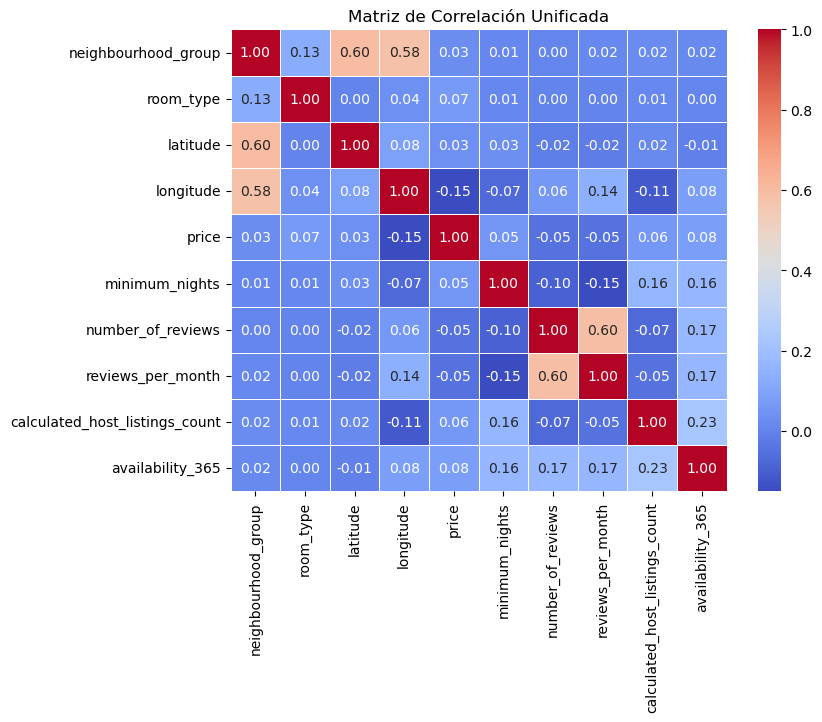

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
!pip install  statsmodels 
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Función para calcular eta cuadrado entre una categórica y una numérica
def eta_squared(df, categorical_col, numerical_col):
    modelo = ols(f'{numerical_col} ~ C({categorical_col})', data=df).fit()
    anova = sm.stats.anova_lm(modelo)
    return anova['sum_sq'].iloc[0] / anova['sum_sq'].sum()

# Función para calcular Cramér's V entre dos categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Función principal para crear la matriz unificada
def crear_matriz_correlacion(df):
    categorias = df.select_dtypes(include=['category', 'object']).columns
    numericas = df.select_dtypes(include='number').columns
    columnas = list(categorias) + list(numericas)

    # Crear matriz vacía
    matriz_correlacion = pd.DataFrame(np.zeros((len(columnas), len(columnas))), index=columnas, columns=columnas)

    # Correlaciones numéricas (Pearson)
    correlaciones_numericas = df[numericas].corr(method='pearson')
    for col1 in numericas:
        for col2 in numericas:
            matriz_correlacion.loc[col1, col2] = correlaciones_numericas.loc[col1, col2]

    # Cramér's V entre variables categóricas
    for i, cat_col1 in enumerate(categorias):
        for cat_col2 in categorias[i+1:]:
            cramer_value = cramers_v(df[cat_col1], df[cat_col2])
            matriz_correlacion.loc[cat_col1, cat_col2] = cramer_value
            matriz_correlacion.loc[cat_col2, cat_col1] = cramer_value

    # Eta cuadrado para combinaciones de categóricas y numéricas
    for cat_col in categorias:
        for num_col in numericas:
            eta_value = eta_squared(df, cat_col, num_col)
            matriz_correlacion.loc[cat_col, num_col] = eta_value
            matriz_correlacion.loc[num_col, cat_col] = eta_value

    # Establecer 1 en la diagonal para variables categóricas
    for cat_col in categorias:
        matriz_correlacion.loc[cat_col, cat_col] = 1
    return matriz_correlacion

# Aplicar la función a df_interes
matriz_correlacion_df_interes = crear_matriz_correlacion(df_interes)

# Visualizar la matriz unificada
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion_df_interes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación Unificada')
plt.show()





#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

Proporción de oferentes por Neighbourhood Group:
neighbourhood_group
Manhattan        0.443178
Brooklyn         0.411041
Queens           0.115855
Bronx            0.022291
Staten Island    0.007635
Name: proportion, dtype: float64

Proporción de oferentes por Tipo de Habitación:
room_type
Entire home/apt    0.519712
Private room       0.456605
Shared room        0.023683
Name: proportion, dtype: float64


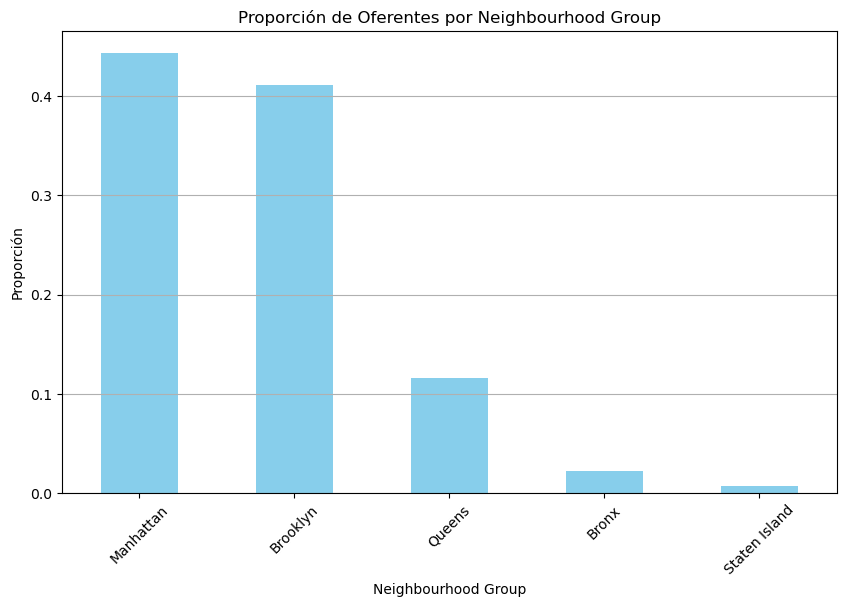

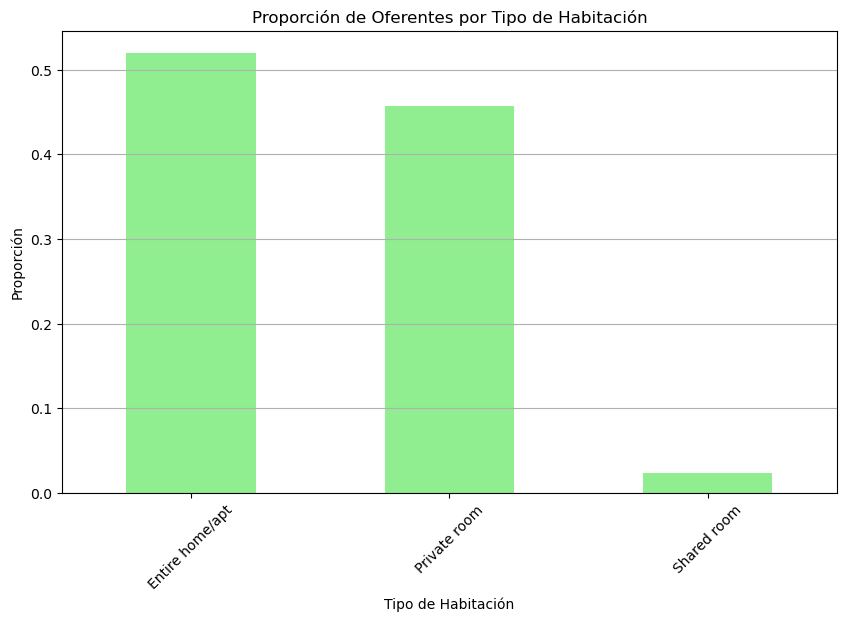

In [20]:
# Calcular la proporción de oferentes por 'Neighbourhood group' y por 'tipo de habitación'
proportion_neighbourhood = df['neighbourhood_group'].value_counts(normalize=True)
proportion_room_type = df['room_type'].value_counts(normalize=True)

# Mostrar los resultados
print("Proporción de oferentes por Neighbourhood Group:")
print(proportion_neighbourhood)
print("\nProporción de oferentes por Tipo de Habitación:")
print(proportion_room_type)

# Graficar la proporción de oferentes por 'Neighbourhood group' 
# hacemos un grafico de barras para mostrar la proporción de oferentes por 'Neighbourhood group'
plt.figure(figsize=(10, 6))
proportion_neighbourhood.plot(kind='bar', color='skyblue')
plt.title('Proporción de Oferentes por Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Graficar la proporción de oferentes por 'Tipo de habitación'
# hacemos un grafico de barras para mostrar la proporción de oferentes por 'Tipo de habitación'
plt.figure(figsize=(10, 6))
proportion_room_type.plot(kind='bar', color='lightgreen')
plt.title('Proporción de Oferentes por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

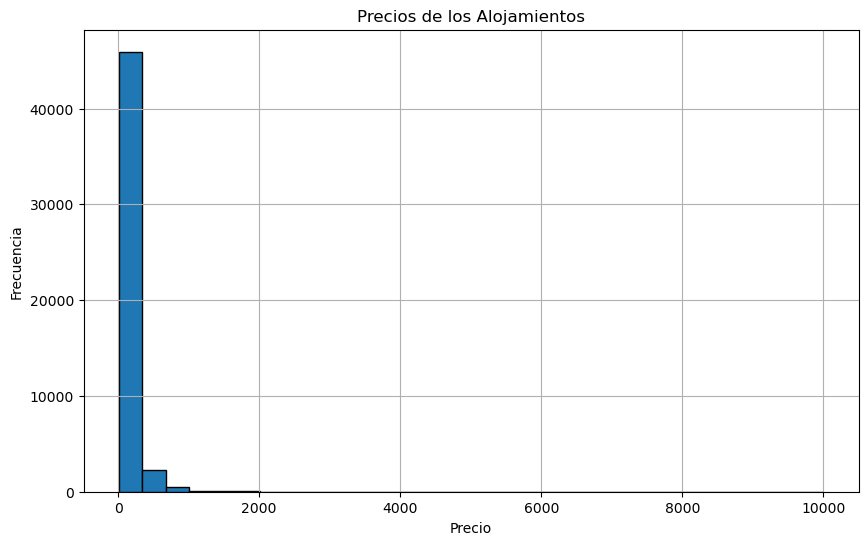

Precio mínimo: 10.0
Precio máximo: 10000.0
Precio promedio: 152.7735906988169

Media de precio por Neighbourhood Group: neighbourhood_group
Bronx             87.539945
Brooklyn         124.461431
Manhattan        196.885687
Queens            99.534099
Staten Island    114.812332
Name: price, dtype: float64

Media de precio por Tipo de Habitación: room_type
Entire home/apt    211.833360
Private room        89.833416
Shared room         70.214347
Name: price, dtype: float64


In [21]:
# Realizo un histograma de los precios de los alojamientos
plt.figure(figsize=(10, 6))
df['price'].hist(bins=30, edgecolor='black')
plt.title('Precios de los Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Precio mínimo, máximo y promedio
precio_minimo = df['price'].min()
precio_maximo = df['price'].max()
precio_promedio = df['price'].mean()


print ("Precio mínimo:", precio_minimo)
print ("Precio máximo:", precio_maximo)
print("Precio promedio:", precio_promedio)

# Media de precio por “Neighbourhood group” y por tipo de habitación
media_precio_neighbourhood = df.groupby('neighbourhood_group')['price'].mean()
media_precio_room_type = df.groupby('room_type')['price'].mean()

print("\nMedia de precio por Neighbourhood Group:",media_precio_neighbourhood)
print("\nMedia de precio por Tipo de Habitación:",media_precio_room_type)


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

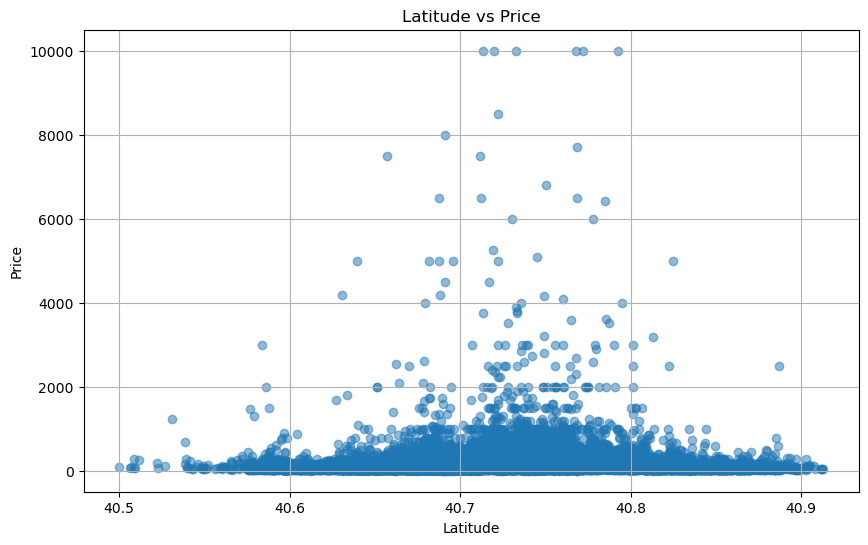

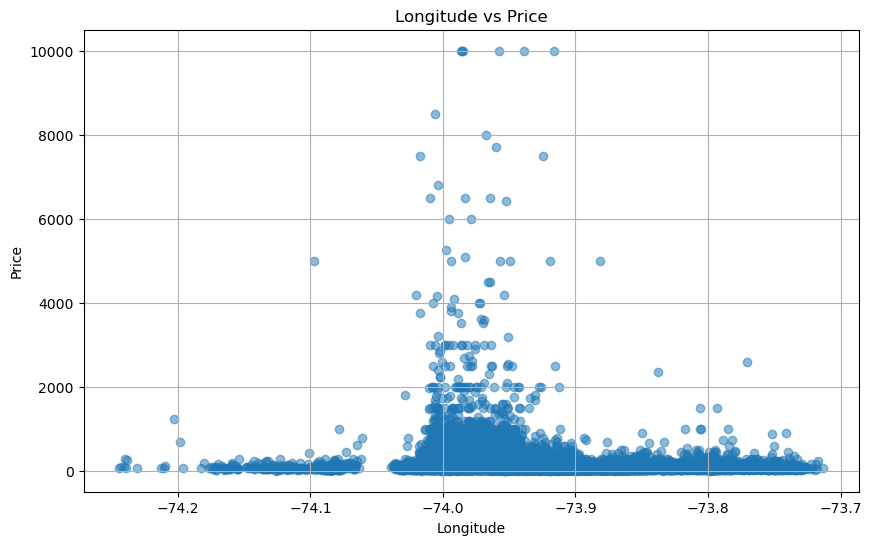

In [22]:
import matplotlib.pyplot as plt

# hacemos un scatter plot para mostrar la relación entre 'latitude' y 'price'
# Scatter plot 1: 'latitude' vs 'price' 
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['price'], alpha=0.5)
plt.title('Latitude vs Price')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#hacemos un scatter plot para mostrar la relación entre 'longitude' y 'price'
# Scatter plot 2: 'longitude' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['price'], alpha=0.5)
plt.title('Longitude vs Price')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.grid(True)
plt.show()


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [23]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [24]:
# Quedarse solo con las columnas numéricas de df_interes
df_interes_numerico = df_interes.select_dtypes(include=['float64', 'int64'])

# Mostrar las primeras filas del nuevo dataframe
df_interes_numerico.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149.0,1,9,0.21,6,365
1,40.75362,-73.98377,225.0,1,45,0.38,2,355
2,40.80902,-73.94190,150.0,3,0,0.00,1,365
3,40.68514,-73.95976,89.0,1,270,4.64,1,194
4,40.79851,-73.94399,80.0,10,9,0.10,1,0


In [25]:
# Mostrar la media y la desviación estándar de las variables numéricas

print(df_interes_numerico.mean())
print(df_interes_numerico.std())

latitude                           40.728954
longitude                         -73.952179
price                             152.773591
minimum_nights                      6.841405
number_of_reviews                  23.274491
reviews_per_month                   1.089884
calculated_host_listings_count      7.147992
availability_365                  112.720248
dtype: float64
latitude                            0.054534
longitude                           0.046159
price                             240.233382
minimum_nights                     16.455570
number_of_reviews                  44.555497
reviews_per_month                   1.576123
calculated_host_listings_count     32.965996
availability_365                  131.595522
dtype: float64


Text(0.5, 1.0, 'Correlation matrix')

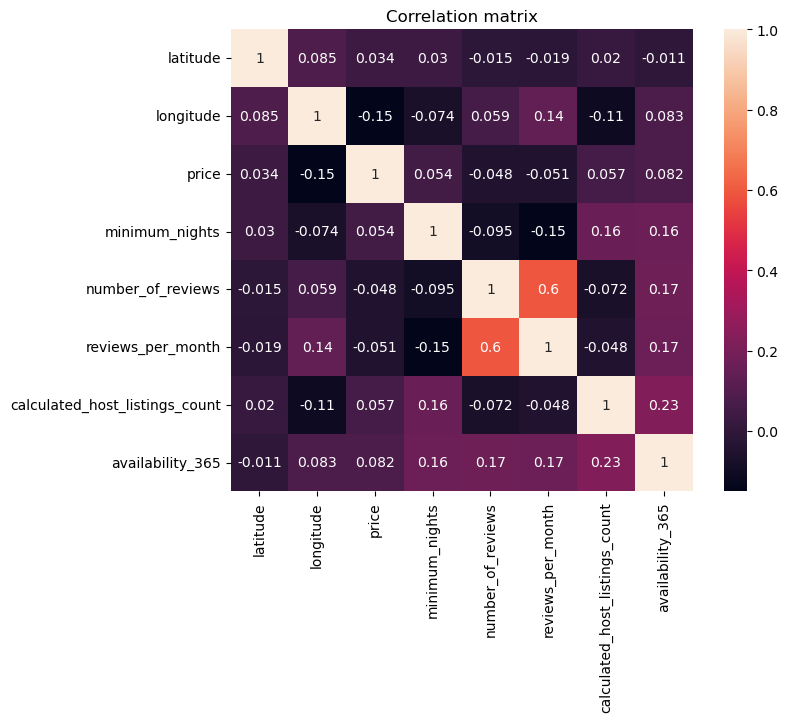

In [26]:
# Graficar la matriz de correlación de las variables numéricas

correlation1 = df_interes_numerico.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation1, vmax=1, square=True,annot=True)

plt.title('Matriz de correlacion')

In [27]:
# Estandarizar las variables numéricas

scaler = StandardScaler(with_std=True, with_mean=True)

# Aplicamos fit_transform al dataframe numérico

df_interes_numerico_transformed = pd.DataFrame(scaler.fit_transform(df_interes_numerico), columns=df_interes_numerico.columns)

# Mostrar la media y la desviación estándar de las variables numéricas estandarizadas

print(df_interes_numerico_transformed.mean()) # luego de la estandarización la media es cero
print(df_interes_numerico_transformed.std()) # la desviación estandar es uno

latitude                          1.248358e-14
longitude                         4.134278e-14
price                            -2.559781e-17
minimum_nights                    8.435641e-18
number_of_reviews                -1.861659e-17
reviews_per_month                -5.119561e-17
calculated_host_listings_count    9.308293e-18
availability_365                  9.308293e-17
dtype: float64
latitude                          1.00001
longitude                         1.00001
price                             1.00001
minimum_nights                    1.00001
number_of_reviews                 1.00001
reviews_per_month                 1.00001
calculated_host_listings_count    1.00001
availability_365                  1.00001
dtype: float64


Text(0.5, 1.0, 'Correlation matrix')

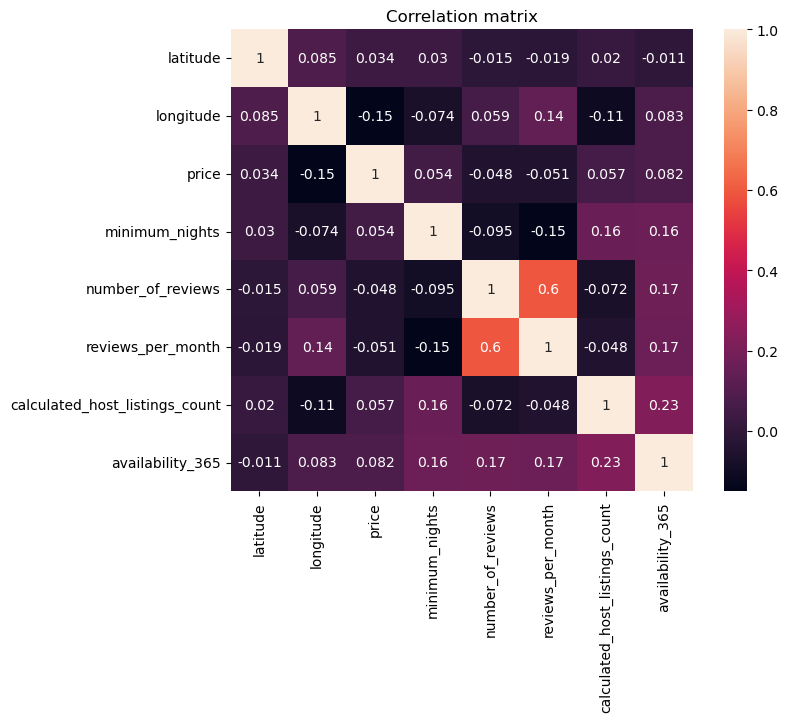

In [28]:
#  Se muestra que la matriz no cambiara al estandarizar las variables

correlation = df_interes_numerico_transformed.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('Correlation matrix')

Varianza explicada: [0.21986444 0.17692508 0.13741471 0.12571609 0.10772814 0.1040076
 0.07910476 0.04923919]
Loadings:
 [[-0.02196736  0.25811657 -0.13888483 -0.22679     0.62204117  0.6438078
  -0.13760048  0.20448219]
 [ 0.02371753 -0.16341004  0.28675781  0.45450656  0.12595987  0.09593599
   0.55275294  0.59440977]
 [-0.54765574 -0.66152029  0.36901991 -0.2145772   0.17905299  0.11937113
  -0.06207522 -0.17344235]
 [ 0.71052757 -0.09816337  0.63874569 -0.16258359  0.0812913   0.06987379
  -0.15855781 -0.12022413]
 [-0.40356128  0.5064944   0.52656655  0.05927068 -0.16380545 -0.10720726
  -0.41708147  0.2958611 ]
 [ 0.06533728 -0.20203947 -0.10368796  0.76450872  0.21835514  0.05206008
  -0.53577264 -0.14914683]
 [-0.16281651  0.38470003  0.25579768  0.27813936  0.08205146  0.21750642
   0.42360822 -0.67023675]
 [ 0.02321181 -0.11864739 -0.02921031  0.0645382  -0.69085962  0.70403359
  -0.07799474  0.03649805]]
Loadings del CP1:
 [-0.02196736  0.25811657 -0.13888483 -0.22679     0.

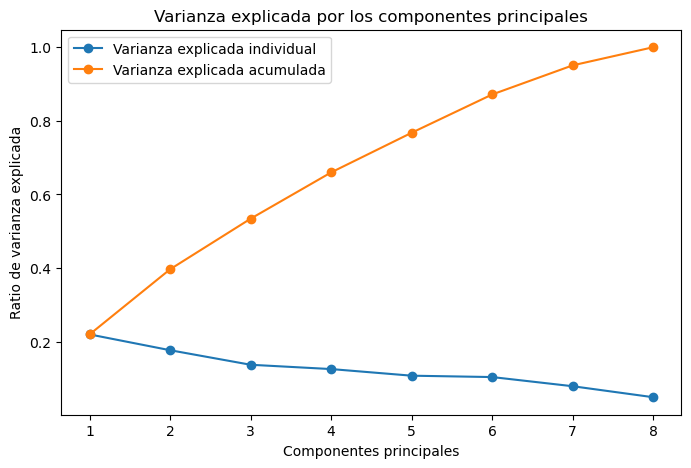

In [49]:
# Se ajusta el modelo
pca = PCA()
df_interes_pca = pca.fit_transform(df_interes_numerico_transformed)

# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)

# Loadings vectors
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0])



# Graficar la varianza explicada por cada componente principal con líneas que unan los puntos
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', label='Varianza explicada individual')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.title('Varianza explicada por los componentes principales')
plt.show()

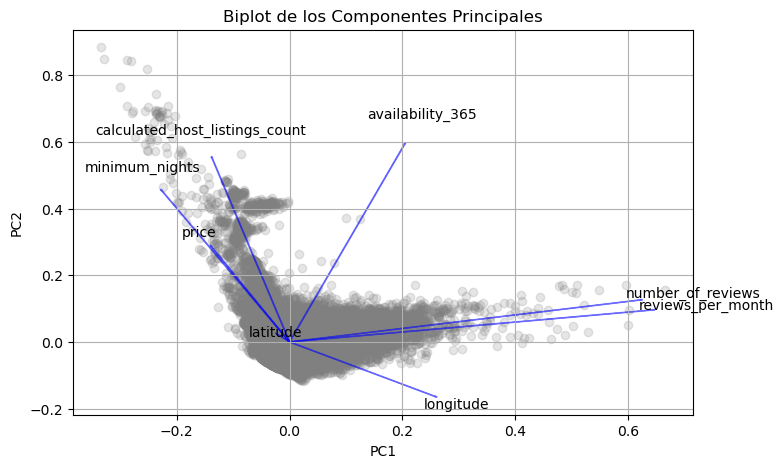

In [46]:
# Crear un biplot para visualizar los componentes principales de forma vectorial

def biplot(score, coeff, labels=None):
    xs = score[:, 0] 
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray', alpha=0.2)
    for i in range(n): 
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='blue', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# Etiquetas de las variables
labels = df_interes_numerico.columns

# Graficar el biplot
plt.figure(figsize=(8, 5))
biplot(df_interes_pca, np.transpose(pca.components_[0:2, :]), labels)
plt.title('Biplot de los Componentes Principales')
plt.show()

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [30]:
# NO HACER

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [31]:
from sklearn.model_selection import train_test_split

# Definir las variables dependientes e independientes
X = df_interes.drop(columns=['price'])
y = df_interes['price']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Agregar la columna de unos (1)
X = sm.add_constant(X)

# Partir la base en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Mostrar las dimensiones de las bases resultantes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')



X_train shape: (34197, 8)
X_test shape: (14657, 8)
y_train shape: (34197,)
y_test shape: (14657,)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [32]:
# Importamos la librería para la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos el modelo de regresión lineal
modelo = LinearRegression()

# Ajustamos el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecimos los precios en los datos de prueba
y_pred = modelo.predict(X_test)

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

# Mostramos los coeficientes del modelo
coeficientes = pd.DataFrame(modelo.coef_, X_train.columns, columns=['Coeficiente'])
print(coeficientes)

Error cuadrático medio (MSE): 63279.632055320566
Coeficiente de determinación (R^2): 0.035144126118395236
                                Coeficiente
const                              0.000000
latitude                         216.167803
longitude                       -805.146282
minimum_nights                     0.020763
number_of_reviews                 -0.219741
reviews_per_month                 -2.983403
calculated_host_listings_count     0.103587
availability_365                   0.177977
